# Regression Models
## Part 2 - Multiple linear regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import sklearn
from sklearn.linear_model import LinearRegression
import seaborn as sb
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')
%matplotlib inline

C:\Users\imran\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


#### (Multiple) linear regression on the enrollment data

In [2]:
address = r'\Data2\enrollment_forecast.csv'

enroll = pd.read_csv(address)
enroll.columns = ['year', 'roll', 'unem', 'hgrad', 'inc']
enroll.head()

,year,roll,unem,hgrad,inc
0,1,5501,8.1,9552,1923
1,2,5945,7.0,9680,1961
2,3,6629,7.3,9731,1979
3,4,7556,7.5,11666,2030
4,5,8716,7.0,14675,2112


In [3]:
enroll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    29 non-null     int64  
 1   roll    29 non-null     int64  
 2   unem    29 non-null     float64
 3   hgrad   29 non-null     int64  
 4   inc     29 non-null     int64  
dtypes: float64(1), int64(4)
memory usage: 1.3 KB


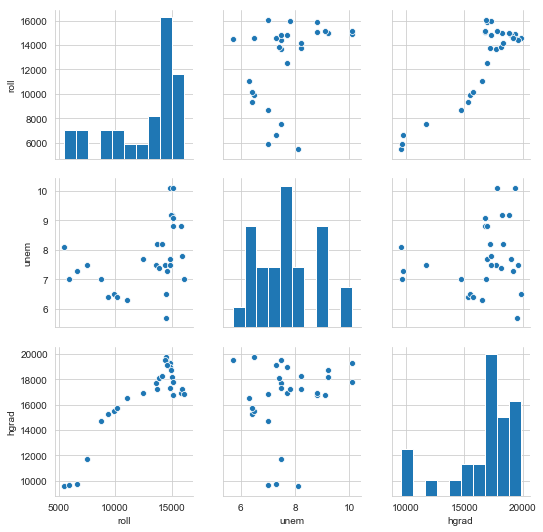

In [4]:
sb.pairplot(enroll[['roll', 'unem', 'hgrad']])

In [5]:
print(enroll[['roll', 'unem', 'hgrad']].corr())

           roll      unem     hgrad
roll   1.000000  0.391344  0.890294
unem   0.391344  1.000000  0.177376
hgrad  0.890294  0.177376  1.000000


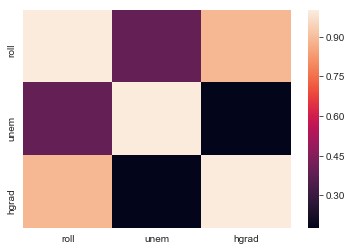

In [6]:
sb.heatmap(enroll[['roll', 'unem', 'hgrad']].corr())

In [7]:
enroll_data = enroll[['unem', 'hgrad']].values

enroll_target = enroll[['roll']].values

X, y = enroll_data, enroll_target

### Checking for missing values

In [8]:
missing_values = X==np.NAN
X[missing_values == True]

array([], dtype=float64)

In [9]:
LinReg = LinearRegression(normalize=True)

LinReg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

### Make a test prediction 

In [10]:
y_pred = LinReg.predict(X)

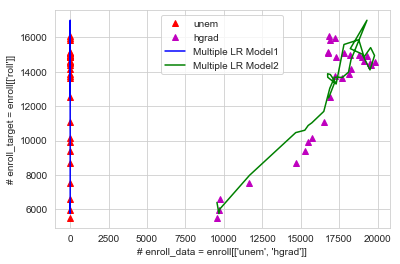

In [11]:
plt.plot(X[:,0], y, 'r^', label='unem')
plt.plot(X[:,1], y, 'm^', label='hgrad')
plt.plot(X[:,0], y_pred, 'b', label='Multiple LR Model1')
plt.plot(X[:,1], y_pred, 'g', label='Multiple LR Model2')
plt.xlabel("# enroll_data = enroll[['unem', 'hgrad']]")
plt.ylabel("# enroll_target = enroll[['roll']]")
plt.legend(loc="best")
plt.show()

In [12]:
print(LinReg.score(X, y))

0.8488812666133722
